# Origine des données

Les données proviennent de la DREES : c'est la **Direction de la recherche, des études, de l'évaluation et des statistiques** du **Ministère des Solidarités et de la Santé.**

La publication se fait sur le site opendata de la DREES : [cliquer sur le lien](https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/information/?disjunctive.vac_statut)

Pour en savoir plus sur les travaux de la DREES : [cliquer sur le lien](https://drees.solidarites-sante.gouv.fr/article/les-travaux-de-la-drees-lies-la-crise-sanitaire-de-la-covid-19)

La publication se fait à un rythme hebdomadaire depuis le 6/08/2021. A cette date, les dernières données disponibles dataient du 23/07.

**On peut donc s'attendre à :**
- publication le 13/08 des données allant jusqu'au 24/07
- publication le 20/08 des données allant jusqu'au 31/07

Au 23/07,
les taux quotidiens pour 100 000 habitants sont les suivants:


- entrées en hospitalisation : 3.83
- entrées en réanimation : 0.98
- décès : 0.25


- incidence : 274.88
- tests PCR : 5299.12
- positivité (%) : 0.52

# Timeline
This analysis was first published on Twitter here: https://twitter.com/E_Dmz/status/1423963822251991040
and here: https://twitter.com/E_Dmz/status/1423692017406775303

Similar analyses can be found here: https://twitter.com/GuillaumeRozier/status/1423609751858991104 (@GuillaumeRozier) and here : https://twitter.com/nicolasberrod/status/1423588729097265155 (@nicolasberrod)

# Libraries and functions

In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

def save_output(fig, dir_name, fig_name, with_date = True, with_SVG = False):
    """Saves pyplot figures as a directory in dir_PNG, with or without the date
    fig: pyplot figure
    dir_fig: str
    name: str
    with_date: boolean
    """
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
        
    now_str = dt.datetime.now().strftime("%Y-%m-%d %H:%M") if with_date else ''
    fname_PNG = f"{dir_name}{now_str} {fig_name}.png"
    fig.savefig(fname_PNG, bbox_inches = 'tight', pad_inches = 0.1, dpi = 150)
    
    if with_SVG:
        dir_SVG = f"{dir_name}SVG/"
        os.makedirs(dir_SVG) if not os.path.exists(dir_SVG) else None
        fname_SVG = f"{dir_SVG}{now_str} {fig_name}.svg"
        fig.savefig(fname_SVG, bbox_inches = 'tight', pad_inches = 0.1, dpi = 150)
        
def pretty_sample(df_name_as_string, nlines = 3):
    """pretty_prints a pandas DataFrame
    df_name_as_string: string"""
    print(f"\n\n***Sample of {df_name_as_string}:")
    return eval(f"{df_name_as_string}.sample(nlines)")

def simplify_df(df, vac_statut):
    """only retain one vac_status"""
    simplified_df = df.copy()
    return simplified_df[simplified_df.vac_statut == vac_statut]

def display_vac_statuts(df):
    """just to check vac_statuses in df"""
    print(df.vac_statut.unique())

# Prepare the data
The data were downloaded from https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/information/?disjunctive.vac_statut into the parent folder of this notebook.


In [2]:
fname = "covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si (4).csv"

In [18]:
df_raw = pd.read_csv(fname, sep = ';', parse_dates = ['date'])
pretty_sample("df_raw")

df = df_raw.copy()
dPrimo = df[df.vac_statut.isin(["Primo dose efficace", "Primo dose récente"])].groupby(['date'])[['nb_PCR', 'nb_PCR_sympt', 'nb_PCR+',
       'nb_PCR+_sympt', 'HC', 'HC_PCR+', 'SC', 'SC_PCR+', 'DC', 'DC_PCR+', 'effectif J-7']].sum().reset_index()
dPrimo['vac_statut'] = 'Somme des primo-doses'
pretty_sample("dPrimo")

df_merged = pd.concat([df, dPrimo])
df_merged = df_merged.sort_values('date')
pretty_sample("df_merged")



df = df_merged.copy()
df['Effectif en Mns'] = df['effectif J-7'] / 1e6
df['PCR_odds'] = df['nb_PCR']/df['effectif J-7'] * 1e7
df['PCR_pos_odds'] = df['nb_PCR+']/df['effectif J-7'] * 1e7
df['positivity'] = df['nb_PCR+']/df['nb_PCR'] * 100
df['HC_odds'] = df['HC']/df['effectif J-7'] * 1e7
df['SC_odds'] = df['SC']/df['effectif J-7'] * 1e7
df['DC_odds'] = df['DC']/df['effectif J-7'] * 1e7

# df['HC_PCR_pos_odds'] = df['HC_PCR+']/df['effectif J-7'] * 1e7
# df['SC_PCR_pos_odds'] = df['SC_PCR+']/df['effectif J-7'] * 1e7
# df['DC_PCR_pos_odds'] = df['DC_PCR+']/df['effectif J-7'] * 1e7

df_with_computed_indicators = df.copy()
pretty_sample("df_with_computed_indicators")

df = df_with_computed_indicators.copy()
df = df[['date', 'vac_statut', 'effectif J-7', 'HC_odds', 'SC_odds', 'DC_odds', 'PCR_odds', 'PCR_pos_odds', 'positivity',
       'Effectif en Mns']]
pretty_sample("df")

for vac_statut in ['Non-vaccinés', 'Somme des primo-doses', 'Vaccination complète']:
    simplified_df = simplify_df(df, vac_statut)
    pretty_sample("simplified_df", nlines = 1)



***Sample of df_raw:


,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif J-7
241,2021-07-22,Non-vaccinés,197749,18443,14519,6550,208,145,54,43,11,8,30384015
153,2021-07-31,Primo dose efficace,14912,713,456,171,6,5,1,1,1,1,5669151
227,2021-06-19,Non-vaccinés,82492,3667,1171,282,99,74,29,23,12,10,36925590




***Sample of dPrimo:


,date,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif J-7,vac_statut
0,2021-05-31,41490,3396,1048,456,48,37,6,4,9,8,13762048,Somme des primo-doses
60,2021-07-30,66832,3228,2527,1063,24,16,5,4,2,2,9804564,Somme des primo-doses
71,2021-08-10,51606,3505,2678,1274,37,34,10,9,2,2,9532118,Somme des primo-doses




***Sample of df_merged:


,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif J-7
10,2021-07-05,Non-vaccinés,171852,9924,3340,1257,94,62,20,13,8,4,33582636
142,2021-06-29,Primo dose efficace,23922,1806,156,61,6,4,0,0,0,0,11961597
137,2021-06-07,Primo dose efficace,31965,1940,331,118,14,12,4,4,3,2,9793043




***Sample of df_with_computed_indicators:


,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif J-7,Effectif en Mns,PCR_odds,PCR_pos_odds,positivity,HC_odds,SC_odds,DC_odds
197,2021-06-21,Vaccination complète,39801,1351,168,40,15,13,3,2,3,3,14192421,14.192421,28043.841146,118.373039,0.422100,10.569021,2.113804,2.113804
59,2021-07-29,Somme des primo-doses,47558,3398,2488,1182,23,22,9,7,0,0,9906986,9.906986,48004.509141,2511.359156,5.231507,23.215941,9.084499,0.000000
270,2021-07-11,Primo dose efficace,4358,276,80,36,3,3,0,0,1,1,10820929,10.820929,4027.380644,73.930806,1.835704,2.772405,0.000000,0.924135




***Sample of df:


,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
112,2021-06-08,Non-vaccinés,40842594,55.334389,15.180231,4.162321,35509.497756,1070.451108,3.014549,40.842594
74,2021-08-19,Primo dose récente,4389108,43.288978,9.113469,0.000000,39572.961066,1829.528916,4.623179,4.389108
1,2021-06-01,Non-vaccinés,43305014,72.047084,17.549931,6.927604,38084.273567,1563.329364,4.104921,43.305014




***Sample of simplified_df:


,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
110,2021-06-06,Non-vaccinés,41619453,37.001928,12.253885,5.766534,5831.167459,189.815085,3.255182,41.619453




***Sample of simplified_df:


,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
21,2021-06-21,Somme des primo-doses,16630312,7.817051,0.0,0.601312,23787.286733,150.929219,0.634495,16.630312




***Sample of simplified_df:


,date,vac_statut,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
100,2021-08-01,Vaccination complète,30332977,10.2199,2.637394,3.626416,5077.642066,120.660758,2.376315,30.332977


# Dernières valeurs

In [12]:
date_max_moins_un = df.date.max() - pd.DateOffset(2)
date_max_moins_un

Timestamp('2021-08-20 00:00:00')

In [19]:
df_last = df[df.date == date_max_moins_un]
df_last = df_last.set_index('vac_statut')
df_last.loc[['Non-vaccinés', 'Primo dose récente', 
        'Primo dose efficace', 'Somme des primo-doses', 'Vaccination complète']]

,date,effectif J-7,HC_odds,SC_odds,DC_odds,PCR_odds,PCR_pos_odds,positivity,Effectif en Mns
vac_statut,,,,,,,,,
Non-vaccinés,2021-08-20,21371757,247.522934,72.057716,35.093044,83403.063211,6569.885667,7.877271,21.371757
Primo dose récente,2021-08-20,4151331,21.679794,7.226598,0.000000,47319.763228,1847.600203,3.904500,4.151331
Primo dose efficace,2021-08-20,5131977,25.331368,11.691401,13.639968,77843.295089,2090.812176,2.685925,5.131977
Somme des primo-doses,2021-08-20,9283308,23.698449,9.694820,7.540416,64193.711983,1982.052087,3.087611,9.283308
Vaccination complète,2021-08-20,36752176,25.848810,4.081391,4.353484,17386.453526,765.124764,4.400695,36.752176


In [21]:
# df_last_ensemble = df_last.loc[['Ensemble']]
# print(f"Au jour du {date_max_moins_un},\n\
# les taux quotidiens pour 100 000 habitants sont les suivants:\n\n\n\
# - entrées en hospitalisation : {df_last_ensemble.HC_odds.values[0] / 10:.2f}\n\
# - entrées en réanimation : {df_last_ensemble.SC_odds.values[0] / 10:.2f}\n\
# - décès : {df_last_ensemble.DC_odds.values[0] / 10:.2f}\n\n\n\
# - incidence : {df_last_ensemble.PCR_pos_odds.values[0]/10:.2f}\n\
# - tests PCR : {df_last_ensemble.PCR_odds.values[0] / 10:.2f}\n\
# - positivité (%) : {df_last_ensemble.positivity.values[0] / 10:.2f}\n\
# ")

# Graphes "à la John Burn-Murdoch"

In [28]:
def plot_Burn_Murdoch(df, vac_statut):
    coeff = -100
    fig, ax = plt.subplots()

    df_to_plot = df[df.vac_statut == vac_statut]
    s = ax.fill_between(df_to_plot.date, df_to_plot.PCR_pos_odds/100, color = 'darkturquoise')
    #     rea_to_plot = d['taux rea']*coeff/100
    #     s = ax.fill_between(d.jour - pd.Timedelta(14,'D'), rea_to_plot, color = 'darksalmon')
#     rea_to_plot = df[df.vac_statut == population]['SC_odds']*coeff
    s = ax.fill_between(df_to_plot.date, df_to_plot.SC_odds*coeff/100, color = 'darksalmon')
    #     ratio_to_plot = - rea_to_plot/incidence_to_plot
    #     s = ax.plot(d.jour, ratio_to_plot)
    
    s = ax.set_ylim(-100, 100)
    
    s=ax.spines['top'].set_visible(False)
    s=ax.spines['right'].set_visible(False)
#     s=ax.spines['bottom'].set_visible(False)
    s=ax.spines['left'].set_visible(False)
    s = ax.xaxis.set_tick_params(bottom = True, labelsize = 9)
    s = ax.set_xlim(dt.datetime(2021, 6, 15), 
                    dt.datetime(2021, 9, 15))
    xloc = []
    for i in range(4):
        xloc.append(dt.datetime(2021, 6 + i, 1))                     
    labels = ['1er juin',
                  '1er juillet', '1er août', '1er septembre']
    s=ax.xaxis.set_ticks(xloc)
    s=ax.xaxis.set_ticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")
    rate_specifier = f"{int(-coeff/100):0,d}".replace(',', ' ')
    s=plt.title(f"{vac_statut}\nEn bleu : cas positifs pour 100 000 d'habitants (taux d'incidence)\nEn rouge : patients en réanimation pour {rate_specifier}M habitants", loc = 'left')
    save_output(fig, './Burn-Murdoch/', vac_statut, with_date = True, with_SVG = False)

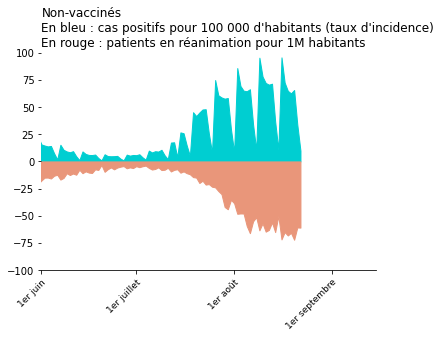

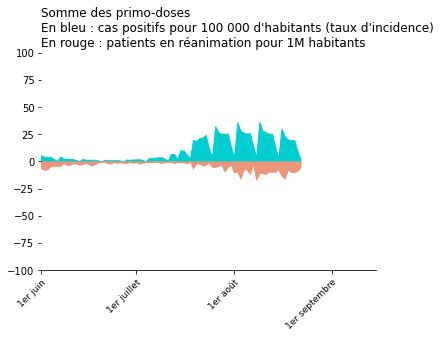

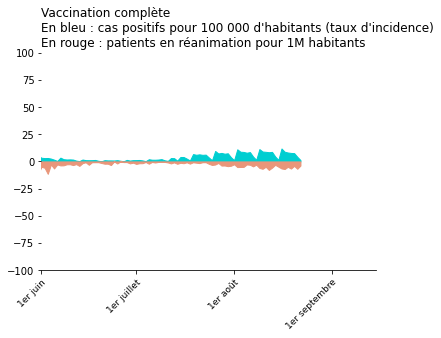

In [29]:
vac_statuts = ['Non-vaccinés', 'Somme des primo-doses', 'Vaccination complète']
for vac_statut in vac_statuts:
    plot_Burn_Murdoch(df, vac_statut)

# Autres graphes

In [34]:
def plot_pop_vaccin(df, label, title, dominante):
    plt.rcParams["figure.facecolor"] = (1,1,1,1)
    fig, ax = plt.subplots()
    populations = ['Non-vaccinés', 'Somme des primo-doses', 'Vaccination complète']
#     colors = ['red', 'orange', 'green']
    colors = [dominante, 'black', 'firebrick']
    linewidths = [3,                 1.5,            1]
    for population, color, linewidth in zip(populations, colors, linewidths):  
        df_pop = df[df.vac_statut == population]
        ax.plot(df_pop.date, df_pop[label], c = color, label = population, linewidth = linewidth)
    plt.legend(title = title)
    ax.xaxis.set_tick_params(bottom = True, labelsize = 10)
    xloc = []
    for i in range(4):
        xloc.append(dt.datetime(2021, 6 + i, 1))                     
    labels = ['1er juin',
                  '1er juillet', '1er août', '1er septembre']
    ax.xaxis.set_ticks(xloc)
    ax.xaxis.set_ticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlim(dt.datetime(2021, 6, 15), 
                    dt.datetime(2021, 9, 15))
#     plt.title(label = title)
    save_output(fig, './Autres graphes/', title, with_SVG = True)

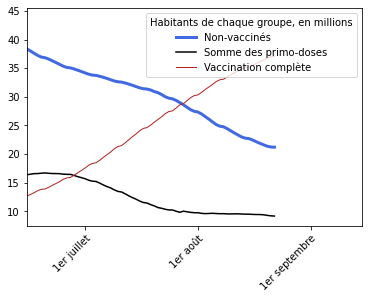

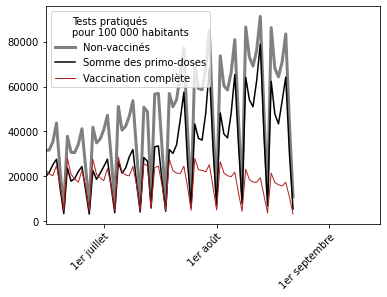

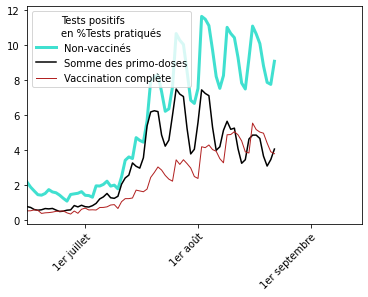

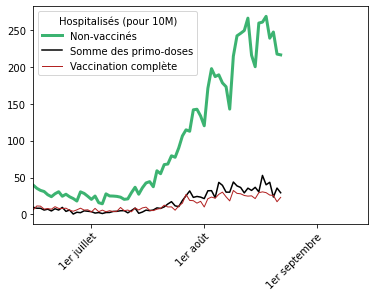

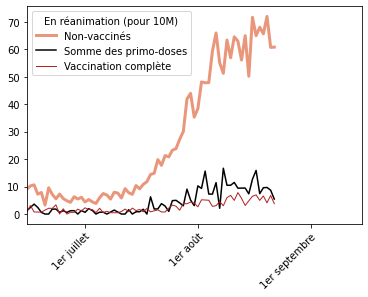

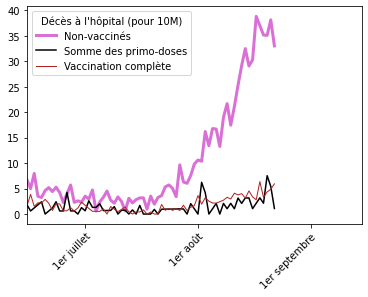

In [35]:
labels = ['Effectif en Mns', 'PCR_odds', 'positivity', 'HC_odds', 'SC_odds', 'DC_odds']
colors = ['royalblue', 'gray', 'turquoise', 'mediumseagreen', 'darksalmon', 'orchid']
titles = ['Habitants de chaque groupe, en millions',
          'Tests pratiqués\npour 100 000 habitants',
          'Tests positifs\nen %Tests pratiqués',
          'Hospitalisés (pour 10M)',
          'En réanimation (pour 10M)',
          'Décès à l\'hôpital (pour 10M)'
         ]

for label, title, color in zip(labels, titles, colors):
    plot_pop_vaccin(df, label, title, color)